 **1818112**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
tennis = pd.read_csv('play_tennis.csv')
tennis.drop('day',axis='columns',inplace=True)#permanent drop of day as it has no use to create model
tennis.head()#printing first five rows

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
#to know the range of dataset
tennis.index

RangeIndex(start=0, stop=14, step=1)

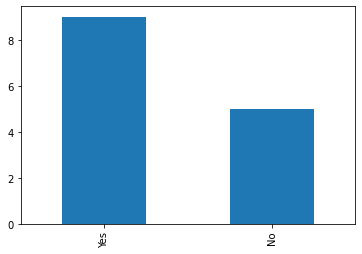

In [ ]:
play = tennis.play.value_counts()
tennis.play.value_counts().plot.bar()
#as per the given dataset,no.of playing tennis days is higher

In [ ]:
#grouping columns with play
outlook_count = tennis.groupby(['outlook', 'play']).size()
temp_count = tennis.groupby(['temp', 'play']).size()
humidity_count = tennis.groupby(['humidity', 'play']).size()
windy_count = tennis.groupby(['wind', 'play']).size()

In [ ]:
play

Yes    9
No     5
Name: play, dtype: int64

In [ ]:
#Total probability of yes and no
P_yes = 9/14
P_no = 5/14
print(P_yes)
print(P_no)

0.6428571428571429
0.35714285714285715


In [ ]:
pd.crosstab(tennis['outlook'],tennis['play'])

play,No,Yes
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [ ]:
p_over_yes = outlook_count['Overcast','Yes']
p_over_no = 0
p_rainy_yes = outlook_count['Rain','Yes'] 
p_rainy_no = outlook_count['Rain','No']
p_sunny_yes = outlook_count['Sunny', 'Yes']
p_sunny_no = outlook_count['Sunny', 'No']
#probability for outlook
p_over_y=p_over_yes/(p_rainy_yes+p_sunny_yes+p_over_yes)#probability for overcast play-yes
p_over_n=p_over_no/(p_rainy_no+p_sunny_no+p_over_no)

p_rain_y=p_rainy_yes/(p_rainy_yes+p_sunny_yes+p_over_yes)#probability for rainy play-yes
p_rain_n=p_rainy_no/(p_rainy_no+p_sunny_no+p_over_no)

p_sunny_y=p_sunny_yes/(p_rainy_yes+p_sunny_yes+p_over_yes)#probability for sunny play-yes
p_sunny_n=p_sunny_no/(p_rainy_no+p_sunny_no+p_over_no)

In [ ]:
pd.crosstab(tennis['temp'],tennis['play'])

play,No,Yes
temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [ ]:
p_cool_yes = temp_count['Cool','Yes']
p_cool_no =temp_count['Cool','No'] 
p_mild_yes = temp_count['Mild','Yes']
p_mild_no =temp_count['Mild','No'] 
p_hot_yes = temp_count['Hot','Yes']
p_hot_no =temp_count['Hot','No'] 

#probability for temp
p_cool_y=p_cool_yes/(p_cool_yes+p_mild_yes+p_hot_yes)#probability for cool play-yes
p_cool_n=p_cool_no/(p_cool_no+p_mild_no+p_hot_no)

p_mild_y=p_mild_yes/(p_cool_yes+p_mild_yes+p_hot_yes)#probability for mild play-yes
p_mild_n=p_mild_no/(p_cool_no+p_mild_no+p_hot_no)

p_hot_y=p_hot_yes/(p_cool_yes+p_mild_yes+p_hot_yes)#probability for hot play-yes
p_hot_n=p_hot_no/(p_cool_no+p_mild_no+p_hot_no)


In [ ]:
pd.crosstab(tennis['humidity'],tennis['play'])

play,No,Yes
humidity,,
High,4,3
Normal,1,6


In [ ]:
p_high_yes = humidity_count['High','Yes']
p_high_no =humidity_count['High','No'] 
p_normal_yes = humidity_count['Normal','Yes']
p_normal_no =humidity_count['Normal','No'] 

# Probability for humidity

p_high_y=p_high_yes/(p_normal_yes+p_high_yes)#probability for high play-yes
p_high_n=p_high_no/(p_normal_no+p_high_no)
p_normal_y=p_normal_yes/(p_normal_yes+p_high_yes)#probability for normal play-yes
p_normal_n=p_normal_no/(p_normal_no+p_high_no)

In [ ]:
pd.crosstab(tennis['wind'],tennis['play'])

play,No,Yes
wind,,
Strong,3,3
Weak,2,6


In [ ]:

p_strong_yes = windy_count['Strong','Yes']
p_strong_no = windy_count['Strong','No']
p_weak_yes = windy_count['Weak','Yes']
p_weak_no = windy_count['Weak','No']

# Probability for wind

p_strong_y = p_strong_yes/(p_weak_yes+p_strong_yes)#probability for Strong play-yes
p_strong_n = p_strong_no/(p_weak_no+p_strong_no)#probability for Strong play-no

p_weak_y= p_weak_yes/(p_weak_yes+p_strong_yes)#probability for weak play-yes
p_weak_n = p_weak_no/(p_weak_no+p_strong_no)#probability for weak play-no

In [ ]:
#x'=(Outlook=rain, Temperature=mild, Humidity=High, Wind=weak)

# Probability of Yes for given x'
Pyes = P_yes * p_rain_y * p_mild_y * p_high_y* p_weak_y
print("The probability of playing tennis is",Pyes)

# Probability of No for given x'
Pno = P_no * p_rain_n * p_mild_n * p_high_n * p_weak_n
print("The probability of not playing tennis is",Pno,"\n")

if Pno > Pyes:
    print("The probability of not playing tennis is higher for the given condition x'")
else:
    print("The probability of playing tennis is higher for the given condition x'")

The probability of playing tennis is 0.021164021164021163
The probability of not playing tennis is 0.01828571428571429 

The probability of playing tennis is higher for the given condition x'


In [ ]:
#y'=(Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong)

# Probability of Yes for given y'
Pyes = P_yes * p_sunny_y * p_cool_y * p_high_y * p_strong_y
print("The probability of playing tennis is",Pyes)

# Probability of No for given y'
Pno = P_no * p_sunny_n * p_cool_n * p_high_n * p_strong_n
print("The probability of not playing tennis is",Pno,"\n")

if Pno > Pyes:
    print("The probability of not playing tennis is higher for the given condition y'")
else:
    print("The probability of playing tennis is higher for the given condition y'")

The probability of playing tennis is 0.005291005291005291
The probability of not playing tennis is 0.02057142857142857 

The probability of not playing tennis is higher for the given condition y'


**Creation,training,analysis and prediction of model**

In [ ]:
number = LabelEncoder()#A LabelEncoder converts a categorical data into a number ranging from 0 to n-1
tennis['outlook'] = number.fit_transform(tennis['outlook'])
tennis['temp'] = number.fit_transform(tennis['temp'])
tennis['humidity'] = number.fit_transform(tennis['humidity'])
tennis['wind'] = number.fit_transform(tennis['wind'])
tennis['play'] = number.fit_transform(tennis['play'])

In [ ]:
#training the model
features = ["outlook", "temp", "humidity", "wind"]
target = "play"


In [ ]:
features_train, features_test, target_train, target_test = train_test_split(tennis[features],tennis[target],test_size = 0.33,random_state = 54)


In [ ]:
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)
print(accuracy)

0.8


In [ ]:
print(model.predict([[1,2,0,1]]))#(Rain,Mild,High,Weak)
#[1] means play-"yes" [0] means play-"no"

[1]
